Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "skkali"

---

# Часть I. Односторонние разностные схемы

Напишите функцию `deriv`, которая вычисляет производную функции в заданной точке $x$, используя одностороннюю разностную схему с заданным шагом $h$ и степенью аппроксимации $O(h^2)$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

def deriv(f, x, h):
    """ Вычисляет производную `f` в точке `x` с шагом `h`.
    Вычисляет производную, используя односторонню разностную схему со степенью аппроксимации $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        Функция, которую нужно продифференцировать
    x : float
        Точка, в которой нужно дифференцировать функцию
    h : float
        Шаг
        
    Rerurns
    -------
    fder : производная f(x) в точке x с шагом h.
    """
    # YOUR CODE HERE
    function = f(x)
    f1 = f(x + h)
    f2 = f(x + 2 * h)
    fder = (-3*function+4*f1-f2)/(2*h)
    return fder

#### Тест I.1

Проверьте ваш алгоритм на простом примере: продифференцируйте $f(x) = x^3$ в точке $x=0$. Прокомментируйте, совпадает ли результат с ожидаемым $f'(x) = 0$ при стремлении $h\to 0$.

In [3]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))


0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


Заметим, что как и ожидалось $\epsilon$ ~h^2


### Тест I.2

Теперь попробуйте немного более сложную функцию $f(x) = x^2 \log{x}$. Оцените значение производной в точке $x=1$, используя *двухточечную* и *трехточечную* схемы. Для обеих схем оцените значение $h$, при котором ошибка перестанет падать.

In [4]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

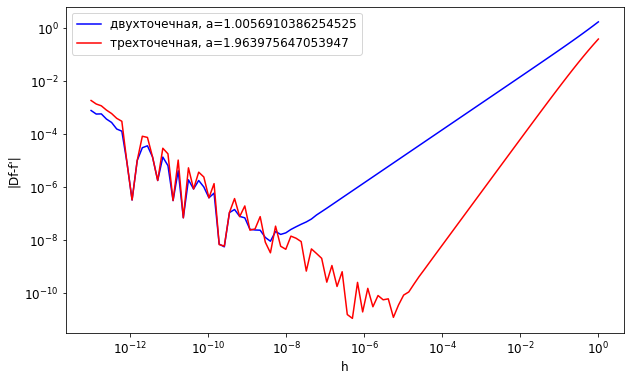

In [5]:
# YOUR CODE HERE

def der_two(x, h):
    chis = f(x + h) - f(x)
    fder = chis/ h
    return fder


def der_three(x, h):
    a = np.array([[1, 1, 1], [0, 1, 2], [0, 1, 4]])
    b = np.array([0, 1, 0])
    c = np.linalg.solve(a, b)
    chis= c[0] * f(x) + c[1] * f(x + h) + c[2] * f(x + 2 * h)
    fder = chis/ h
    return fder

h_arr = np.logspace(-13, 0, num=100)

df_forward_arr = np.array([])
df_central_arr = np.array([])
x=1
for h in h_arr:
    df_forward_arr = np.append(df_forward_arr, np.abs(der_two(x, h)-fder(x)))
    df_central_arr = np.append(df_central_arr, np.abs(der_three(x, h)-fder(x)))
index_1 = h_arr > 1e-6
index_2 = h_arr > 1e-4

p_forward = np.polyfit(
    np.log10(h_arr[index_1]), np.log10(df_forward_arr[index_1]), 1)
p_central = np.polyfit(
    np.log10(h_arr[index_2]), np.log10(df_central_arr[index_2]), 1)

plt.figure(figsize=(10, 6))
plt.loglog(h_arr, df_forward_arr, 'b-',label='двухточечная, a={}'.format(p_forward[0]))
plt.loglog(h_arr, df_central_arr, 'r-',label='трехточечная, a={}'.format(p_central[0]))
plt.xlabel('h')
plt.ylabel('|Df-f\'|')
plt.legend()
plt.show()


### Тест I.3 

Теперь продифференцируйте $x^2 \log(x)$ в $x=0$. Используйте трехточечную схему. Заметьте, что в нуле функцию нужно доопределить явным образом. Постройте зависимость ошибки от величины шага $h$. Объясните полученные результаты.



In [6]:
def f(x):
    if x == 0:
        # предел $x^2 log(x)$ при $x-> 0$ равен нулю, хотя log(x) не определен в x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


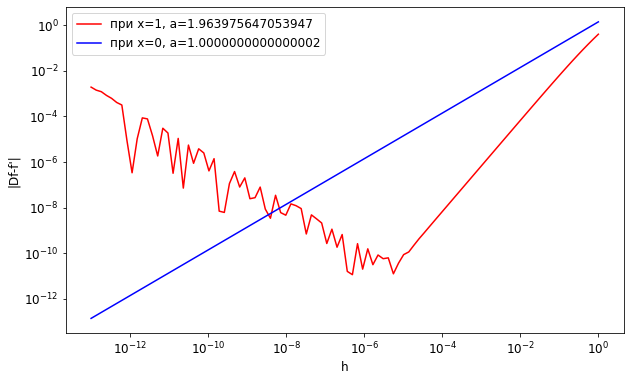

Наклон = 1.3862943611198908


In [7]:
# YOUR CODE HERE
x1=0
x2=1
h_arr = np.logspace(-13, 0, num=100)

df_forward_arr = np.array([])
df_central_arr = np.array([])

for h in h_arr:
    df_forward_arr = np.append(df_forward_arr, np.abs(deriv(f, x1, h)-fder(x1)))
    df_central_arr = np.append(df_central_arr, np.abs(deriv(f, x2, h)-fder(x2)))

index_1 = h_arr > 1e-6
index_2 = h_arr > 1e-4

p_forward = np.polyfit(
    np.log10(h_arr[index_1]), np.log10(df_forward_arr[index_1]), 1)
p_central = np.polyfit(
    np.log10(h_arr[index_2]), np.log10(df_central_arr[index_2]), 1)

plt.figure(figsize=(10, 6))
plt.loglog(h_arr, df_central_arr, 'r-',label='при x=1, a={}'.format(p_central[0]))
plt.loglog(h_arr, df_forward_arr, 'b-',label='при x=0, a={}'.format(p_forward[0]))
plt.xlabel('h')
plt.ylabel('|Df-f\'|')
plt.legend()
plt.show()

print("Наклон =", (df_forward_arr[-1] - df_forward_arr[0]) / (h_arr[-1] - h_arr[0]))

$\epsilon$ =(-3f(0)+4f(h)-f(2h))/2h => $\epsilon$ =2hln(2), причем 2ln(2)≈1.38629

# Часть II. Midpoint rule

Напишите функцию, вычисляющую определенный интеграл, используя midpoint rule, с точностью до заданной погрешности $\epsilon$. Оценивайте ошибку, сравнивая значения интеграла для $N$ и $2N$ элементарных интервалов.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

def midpoint_rule(func, a, b, eps):
    n = 1
    I_n = func((a + b) / 2) * (b - a)
    I_2n = (func((a + (a + b) / 2) / 2) + func(((a + b) / 2 + b) / 2)) * (b - a) / 2
    while abs(I_2n - I_n) >= eps:
        n += 1
        h = (b - a) / n
        i = np.arange(1, n + 1)
        I_n = (func((i - 0.5) * h) * h).sum()
        
        h = (b - a) / (2 * n)
        i = np.arange(1, 2 * n + 1)
        I_2n = (func((i - 0.5) * h) * h).sum()

    integral = I_n 
    return integral, n

### Тест II.1

Протестирутйте ваш алгоритм на простом интеграле, который вы можете посчитать аналитически.

Сравните скорость сходимости с ожидаемой $O(N^{-2})$ в зависимости от количества интервалов, необходимых для заданной точности $\epsilon$.

Сравните полученный результат с ответом, вычисленным "руками". Попадает ли результат в интервал заданной ошибки?

(20% итоговой оценки)


значение интеграла 6.386672500000001


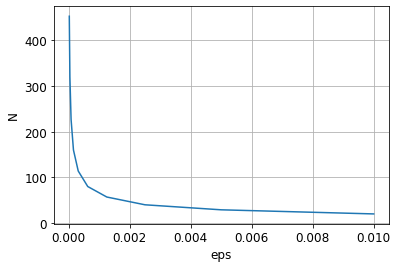

In [15]:
f = lambda x: x**4
a, b = 1, 3
intg, n = midpoint_rule(f, a, b, eps=10**(-2))
print("значение интеграла",intg)

eps = [0.01 / 2**(i) for i in range(10)]
N = [midpoint_rule(f, a, b, eps=0.01 / 2**(i))[1] for i in range(10)]
plt.plot(eps, N)
plt.xlabel("eps")
plt.ylabel("N")
plt.grid(True)

YOUR ANSWER HERE

## Тест II.2

Используя ваш алгоритм, посчитайте значение

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

с точностью до $\epsilon=10^{-4}$.

Заметим, что интеграл содержит интегрируемую особенность в нижнем пределе. Выполните вычисление двумя способами: во первых, посчитайте интеграл "в лоб", во вторых, вычтите особенность из подынтегрального выражения. Сравните количество необходимых итераций для достижения заданной точности $\epsilon$.

(30% итоговой оценки)

In [16]:
# YOUR CODE HERE
def func(x): return 2 * np.sin(x) / x
print('I =', midpoint_rule(func, 0, 1, 10**(-4))[0], 'N =', midpoint_rule(func, 0, 1, 10**(-4))[1] )

def func1(x): return 2 + np.sin(np.sqrt(x)) / x - 1 / np.sqrt(x)
print('I =', midpoint_rule(func1, 0, 1, 10**(-4))[0], 'N =', midpoint_rule(func1, 0, 1, 10**(-4))[1] )


I = 1.8922941998480554 N = 14
I = 1.8920193180026728 N = 16


# Часть  III 


Вычислите определённый интеграл **методом трапеций**  с вычитанием сингулярности

$$
I = \int_{0}^{1}\frac{e^x}{\sqrt{x(1-x)}}dx.
$$

Преобразуйте данный интеграл, вычитая сингулярности. Выпишите расчетные формулы.

Вам могут пригодиться значения следующих определенных интегралов:

$$
\int_0^1 \frac{1}{\sqrt{x (1-x)}} \, dx=\pi,\quad \int_0^1 \frac{x}{\sqrt{x (1-x)}} \, dx=\pi/2.
$$

YOUR ANSWER HERE

Cоставьте функцию, возвращающую значение интеграла методом трапеций.

In [17]:
def integ(npts=10):
    """Compute the value of the integral above.
    
    Subtract the singularities and use the trapezoid rule. 
    
    Parameters
    ----------
    npts : int
        The number of points for the trapezoid rule
        
    Returns
    -------
    I : float
       The computed value of the integral
    """
    # YOUR CODE HERE

In [18]:
# this is a test to check your computed value
from numpy.testing import assert_allclose
